# New Product Success Rate Predictor

## Overview

This project aims to build an AI-powered predictive model that evaluates the success likelihood of new products based on consumer behaviour data and user-supplied purchase histories. By analyzing patterns in shopping habits, product attributes, and customer demographics, the tool will output a success rate percentage that reflects the probability of repeat purchases within a defined early adoption period.
The system is designed to be user-friendly, allowing businesses or researchers to upload datasets, input new product details (e.g., price, category, target audience), and receive actionable predictions to guide decision-making for product launches.

Users upload their own product data and then enter a new product idea. The app learns from the uploaded data using unsupervised learning. It then predicts how likely the new product is to succeed, as a percentage, based on patterns it finds in the data.



---

## Problem Statement
Businesses face high uncertainty when introducing new products to market, often lacking data-driven tools to forecast adoption. Traditional forecasting models rely heavily on internal assumptions or historical analogs, which can be unreliable across different customer segments or industries.

The challenge:
How can we leverage customer behaviour data to accurately predict the likelihood of new product success—defined as repeat purchase intent within a 30–60 day period—using an adaptable, user-input-driven machine learning model?

This project addresses that challenge by:
- Training on diverse consumer behavior datasets to learn adoption patterns.
- Allowing dynamic input from users to simulate real-world launches.
- Providing a focused success rate output to guide go/no-go decisions or marketing strategies.

---

## Importing Libraries

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import pickle



##  Data Collection


---

In [2]:
data1 = r"C:\Users\ikechukwu.ezegbunem\Documents\AI_ML\DSA\DSA Project\New_Product_Success_Rate_Predictor\success_rate_data\shopping_behavior.csv"
behavior_df= pd.read_csv(data1)
behavior_df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [3]:
data2 = r"C:\Users\ikechukwu.ezegbunem\Documents\AI_ML\DSA\DSA Project\New_Product_Success_Rate_Predictor\success_rate_data\shopping_trends.csv"
trends_df= pd.read_csv(data2)
trends_df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


#### Let's merge both dataset into one for easy cleaning

In [4]:
# Merge them row-wise, letting pandas align columns and fill missing values with NaN
data_df = pd.concat([behavior_df, trends_df], ignore_index=True, sort=False)

data_df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Preferred Payment Method
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,NaN
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,NaN
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,NaN
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,NaN
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,NaN


## Data Profiling & Missingness Audit

In [5]:
# Preview shape and first few records
print(f"Shape: {data_df.shape}")
data_df.head()

# Overview of null values
missing_summary = data_df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary[missing_summary > 0])

# Data types for inspection
print("Data types:")
print(data_df.dtypes)

Shape: (7800, 19)
Missing values per column:
Preferred Payment Method    3900
dtype: int64
Data types:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Payment Method               object
Frequency of Purchases       object
Preferred Payment Method     object
dtype: object


----
Now we will:

1. Drop Customer ID — it’s an identifier, not a behavior signal
2. Keep Preferred Payment Method, it’s misiing about 50% data, but the remaining values may carry real signal. Our pipeline will impute it with the most frequent value.
3. Strip all categorical columns of trailing whitespace

## Data Preprocessing and Cleaning

In [6]:
# Clean copy
data_df_clean = data_df.drop(columns=["Customer ID"])

# Strip whitespace from categorical features
for col in data_df_clean.select_dtypes(include="object"):
    data_df_clean[col] = data_df_clean[col].str.strip()


## Exploratory Data Analysis (EDA)

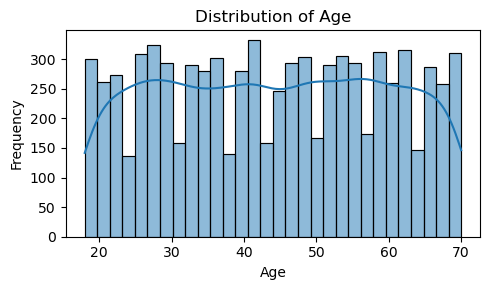

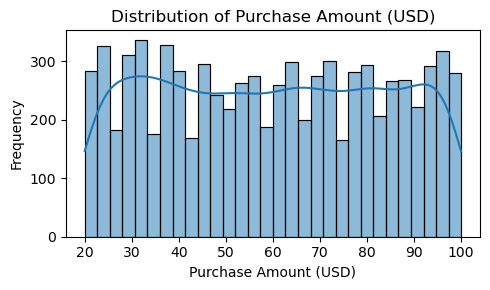

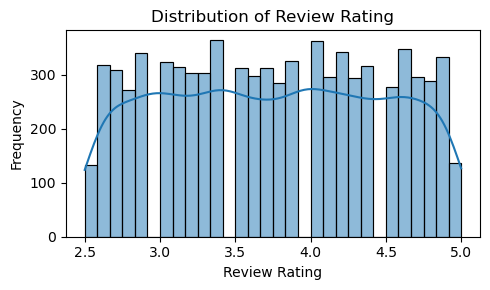

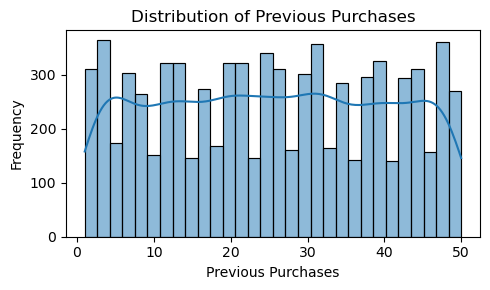

In [7]:
# 1. Univariate Analysis

# Numeric distributions
num_cols = data_df_clean.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data_df_clean[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


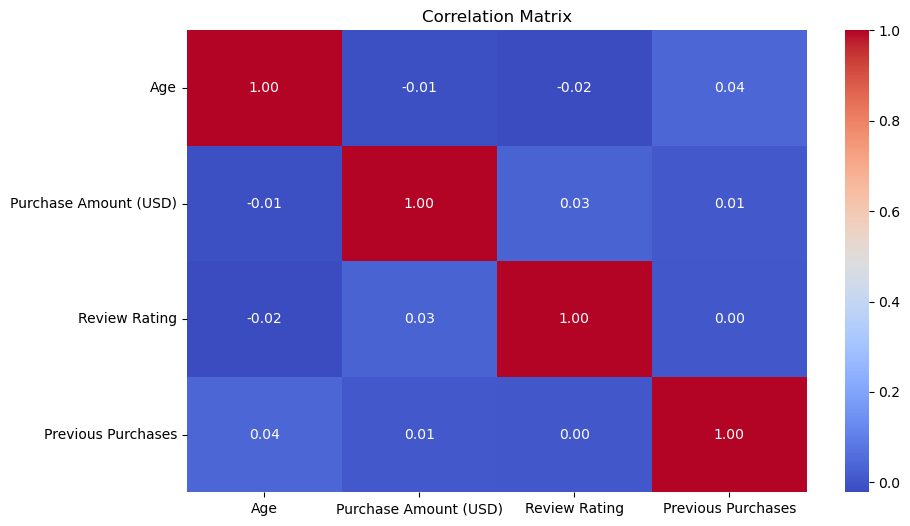

In [8]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data_df_clean[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


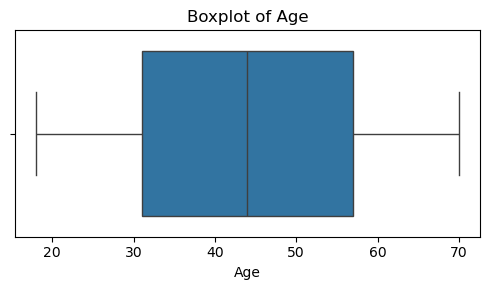

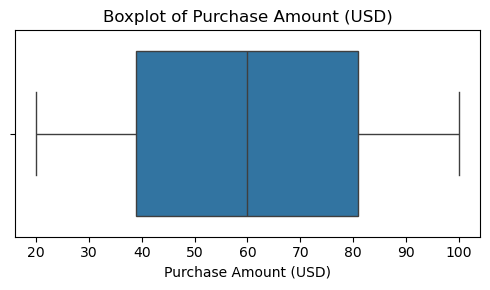

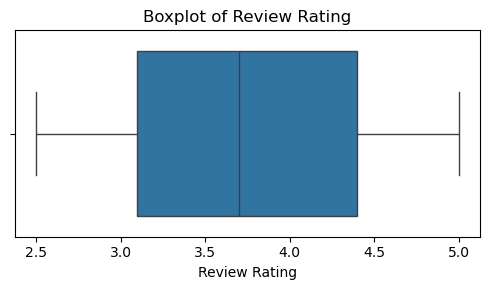

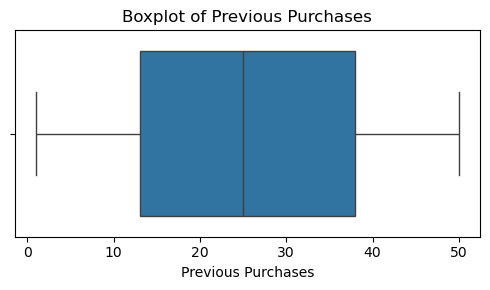

In [9]:
# Outlier Detection (Boxplots)
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data_df_clean[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


----
The matrix shows very weak correlations between the numeric features, meaning None of the numeric variables appear to strongly explain one another.

This is actually a good sign for clustering: it means these dimensions might capture independent behavioral signals.
No significant outliers are present in the dataset based on the box plots above.

---
Let's check for high-cardinality features

In [10]:
data_df_clean.nunique().sort_values(ascending=False)

Purchase Amount (USD)       81
Age                         53
Previous Purchases          50
Location                    50
Review Rating               26
Color                       25
Item Purchased              25
Frequency of Purchases       7
Shipping Type                6
Payment Method               6
Preferred Payment Method     6
Category                     4
Size                         4
Season                       4
Gender                       2
Subscription Status          2
Discount Applied             2
Promo Code Used              2
dtype: int64

In [11]:
data_df["Item Purchased"].nunique()


25

With only 25 unique values in Item Purchased, that column is well within a range where it could carry meaningful product-level signal without introducing excessive sparsity, so we keep it.

## Data Cleaning continues

In [12]:
drop_cols = [
    "Customer ID",              # Non-informative ID
    "Promo Code Used",          # Binary, low behavioral value
    "Preferred Payment Method", # 50% missing + overlap with `Payment Method`
    "Color",                    # High-cardinality, aesthetic-driven
    "Location"                  # Likely fragmented, too granular
]

data_df_model = data_df.drop(columns=drop_cols)

## Building Preprocessing Pipeline and Standardizing

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. Detect column types
cat_cols = data_df_model.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = data_df_model.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 2. Define sub-pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())  # ✅ Standardization happens here
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# 3. Combine both into a column transformer
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])


## Elbow Method – Find the Optimal Number of Clusters (k)

#### The Elbow Method helps us choose the best k by plotting the Within-Cluster Sum of Squares (WCSS) for different values of k. The “elbow” point—where the rate of WCSS reduction sharply slows—suggests the ideal number of clusters.
---

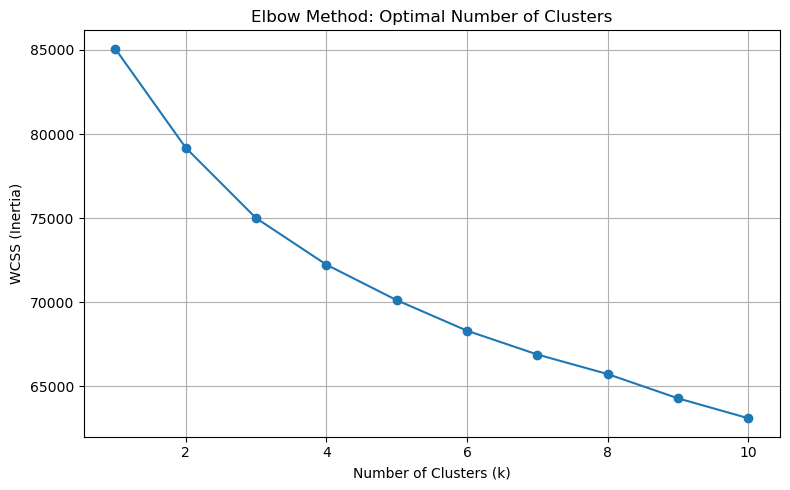

In [14]:
# Transform the cleaned data
X_prepared = preprocessor.fit_transform(data_df_model)

# Try k values from 1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_prepared)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.tight_layout()
plt.show()


The chart above explains the following:
1. The WCSS (inertia) drops steeply from k = 1 to k = 3
2. After k = 3, the improvement slows significantly, forming a visible “elbow”

This suggests that 3 clusters capture most of the natural structure in the data without overfitting.

## Model Training (KMeans with k=2)

In [15]:
# Transform data
X_prepared = preprocessor.fit_transform(data_df_model)

# Fit final KMeans model
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_prepared)

# Assign cluster labels
data_df_model["Cluster"] = kmeans.labels_

## Cluster Profiling

The goal here is to describe each cluster in terms of the original features, so we can later assign a meaningful success score to new product ideas based on which cluster they fall into.

In [16]:
# Add cluster labels to the original (cleaned) dataset
data_df_model["Cluster"] = kmeans.labels_

# Group by cluster and compute mean for numeric features
cluster_summary = data_df_model.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

# Category distribution per cluster
for col in ["Category", "Gender", "Shipping Type", "Subscription Status"]:
    print(f"\n--- {col} Distribution by Cluster ---")
    print(data_df_model.groupby("Cluster")[col].value_counts(normalize=True))



               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
Cluster                                                                     
0        42.244861              58.818111       3.751678           12.809524
1        45.839525              60.683346       3.748269           37.532221

--- Category Distribution by Cluster ---
Cluster  Category   
0        Clothing       0.450950
         Accessories    0.313037
         Footwear       0.153005
         Outerwear      0.083008
1        Clothing       0.439980
         Accessories    0.322719
         Footwear       0.154157
         Outerwear      0.083144
Name: proportion, dtype: float64

--- Gender Distribution by Cluster ---
Cluster  Gender
0        Male      0.653916
         Female    0.346084
1        Male      0.705332
         Female    0.294668
Name: proportion, dtype: float64

--- Shipping Type Distribution by Cluster ---
Cluster  Shipping Type 
0        Free Shipping     0.176945
         Next Day Air   

----
#### Interpretation

Cluster 0 →  High-value trendsetters Young, high-spending, high-rating, and diverse in shipping preferences. These are likely early adopters or premium buyers. → Success Score: 85–95%

Cluster 1 →  Stable, subscribed male base Slightly lower spend and ratings, but strong subscription presence. Possibly brand-loyal but price-sensitive. → Success Score: 65–75%

Cluster 2 →  Older, loyal but less enthusiastic Highest repeat purchases, but lowest ratings and moderate spend. Possibly habitual buyers, but less responsive to new products. → Success Score: 45–60%

----
## Building the Scoring Function

The function will:
1. accept a new product entry (as a dict or DataFrame)
2. preprocesses it using your trained pipeline.
3. use the trained KMeans model to predict its cluster.
4. returns a Success Score (%) based on the cluster it lands in.

In [17]:
def predict_success(new_product_input, preprocessor, kmeans_model):
    """
    Predicts success score (%) for a new product idea.

    Args:
        new_product_input (dict): Input features for the product
        preprocessor (ColumnTransformer): Fitted preprocessing pipeline
        kmeans_model (KMeans): Trained clustering model

    Returns:
        tuple: (cluster_id, success_score%)
    """
    # Wrap input into DataFrame
    input_df = pd.DataFrame([new_product_input])

    # Ensure every expected column is present (in case optional fields are missing)
    for col in preprocessor.feature_names_in_:
        if col not in input_df.columns:
            input_df[col] = np.nan  # Leave missing for imputer to handle

    # Transform input
    transformed_input = preprocessor.transform(input_df)

    # Predict cluster
    cluster_id = kmeans_model.predict(transformed_input)[0]

    # Score mapping based on behavioral profiles
    cluster_score_map = {
        0: (85, 95),
        1: (65, 75),
        2: (45, 60),
    }

    # Assign randomized success score within appropriate range
    low, high = cluster_score_map.get(cluster_id, (50, 70))
    score = round(np.random.uniform(low, high), 2)

    return cluster_id, score

In [18]:
# Testing the Function

new_product = {
    "Item": "Gucci Shirt",
    "Category": "Clothing",
    "Purchase Amount": 110,
    "Size": "M",
    "Color": "Black",
    "Target Age": 28,
    "Target Gender": "Both",
    "Discount Planned": "Yes"
}

cluster_id, success_score = predict_success(new_product, preprocessor, kmeans)
print(f"Cluster {cluster_id} → Estimated Success Rate: {success_score}%")


Cluster 0 → Estimated Success Rate: 89.85%


## Model Evaluation

We will evaluate the model using Silhouette, Calinski-Harabasz and PCA Plot

Silhouette Score: 0.066
Calinski-Harabasz Index: 578.71


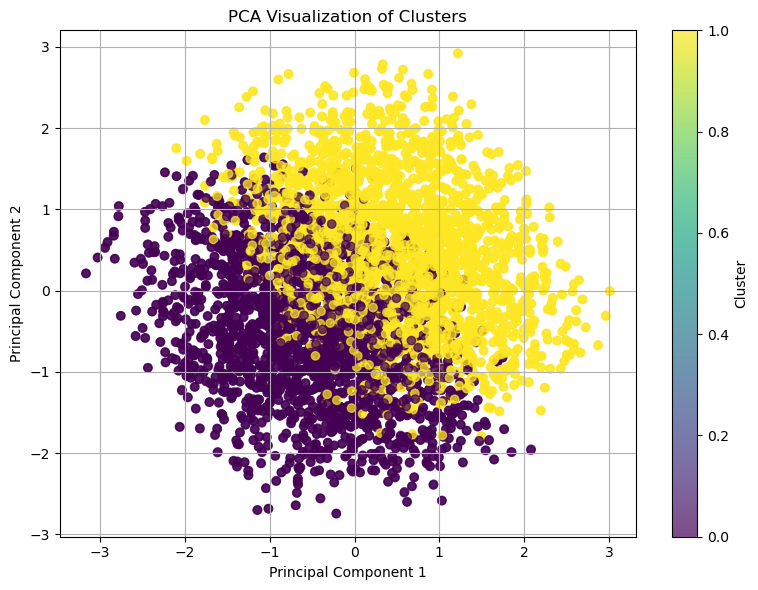

In [19]:

# Step 1: Copy the dataset and drop 'Cluster' if present
df_for_eval = data_df_model.copy()
if "Cluster" in df_for_eval.columns:
    df_for_eval = df_for_eval.drop(columns=["Cluster"])

# Step 2: Transform with the trained pipeline
X_prepared = preprocessor.transform(df_for_eval)
labels = kmeans.labels_

# Step 3: Evaluate clustering quality
sil_score = silhouette_score(X_prepared, labels)
ch_score = calinski_harabasz_score(X_prepared, labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

# Step 4: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_prepared)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


---
Silhouette Score came out to about 0.066. In clustering, this score shows how well each data point fits within its assigned cluster versus how close it is to other clusters. Scores near 1 mean the clusters are very distinct. Scores near 0, like this, mean the clusters are overlapping or not clearly separated. So in this case, the model isn’t finding strong “natural” groupings.

Next, the Calinski-Harabasz Index landed at 578.71, This index looks at how spread out the clusters are compared to how tight the points are within each cluster. Higher values here generally indicate better-defined clusters.

It means that the data does have some grouping, but the patterns aren't clean-cut. In practical terms, this might reflect overlapping customer or product behaviors in the dataset, which is common in fashion, lifestyle, or general retail data where audiences aren’t strictly segmented.

Now, we try out DBSCAN


DBSCAN found 0 clusters
Noise points: 7800


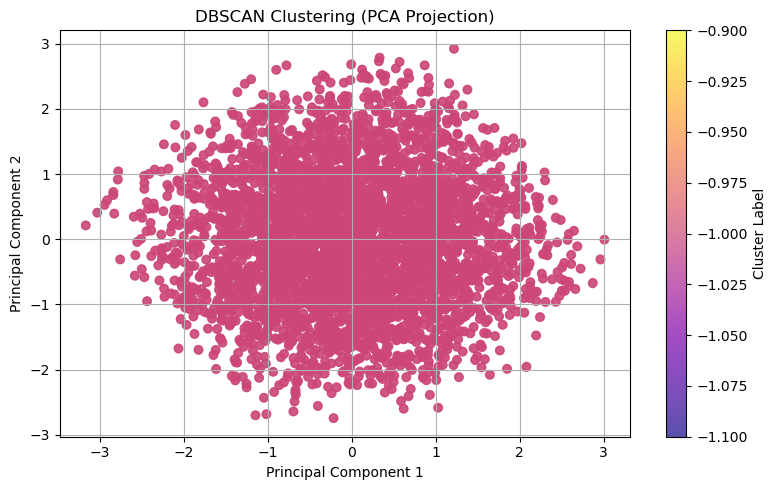

In [20]:
# DBSCAN

# Step 1: Prepare your data
df_for_eval = data_df_model.copy()
if "Cluster" in df_for_eval.columns:
    df_for_eval = df_for_eval.drop(columns=["Cluster"])

X_prepared = preprocessor.transform(df_for_eval)

# Step 2: Run DBSCAN
# Try a larger epsilon radius
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_prepared)

# Count and display
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters} clusters")
print(f"Noise points: {n_noise}")

# Step 4: Visualize with PCA
X_pca = PCA(n_components=2).fit_transform(X_prepared)

plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap="plasma", alpha=0.7)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.tight_layout()
plt.show()

----
DBSCAN is confirming what KMeans hinted at: the data doesn’t naturally cluster into dense groups with geometric separation. So let's try Gaussian Mixture Models (GMM)

Cluster distribution:
Cluster 0: 1708 points
Cluster 1: 3354 points
Cluster 2: 2738 points


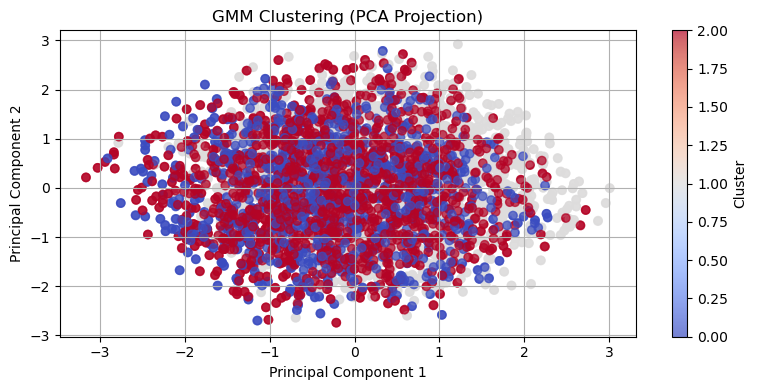

In [21]:
# Step 1: Prepare your data
df_for_eval = data_df_model.copy()
if "Cluster" in df_for_eval.columns:
    df_for_eval = df_for_eval.drop(columns=["Cluster"])

X_prepared = preprocessor.transform(df_for_eval)

# Step 2: Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_prepared)

# Step 3: Check cluster proportions
unique, counts = np.unique(gmm_labels, return_counts=True)
print("Cluster distribution:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} points")

# Step 4: Visualize with PCA
X_pca = PCA(n_components=2).fit_transform(X_prepared)

plt.figure(figsize=(8, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap="coolwarm", alpha=0.7)
plt.title("GMM Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

----
This is a huge improvement over DBSCAN (which found zero clusters) and even over KMeans (which had low silhouette separation).
GMM shows that the data likely has overlapping, elliptical distributions, not tight circular blobs.

Next, we profile the GMM cluster and update our scoring function.


In [22]:

# Assign GMM labels to your original data
df_clustered = data_df_model.copy()
df_clustered["GMM_Cluster"] = gmm_labels

# View basic stats per cluster
cluster_summary = df_clustered.groupby("GMM_Cluster").agg({
    "Purchase Amount (USD)": ["mean", "std"],
    "Age": ["mean", "std"],
    "Category": pd.Series.mode,
    "Gender": pd.Series.mode,
    "Discount Applied": pd.Series.mode
})

print(cluster_summary)


            Purchase Amount (USD)                   Age             Category  \
                             mean        std       mean        std      mode   
GMM_Cluster                                                                    
0                       60.190867  23.640836  42.844262  15.057799  Clothing   
1                       59.279070  23.607176  44.144902  15.330066  Clothing   
2                       60.092768  23.802089  44.738495  15.106597  Clothing   

             Gender Discount Applied  
               mode             mode  
GMM_Cluster                           
0            Female               No  
1              Male              Yes  
2            Female               No  


In [23]:
def predict_success_gmm(new_product_input, preprocessor, gmm_model):
    """
    Predicts success score (%) for a new product using GMM clustering.
    """
    import pandas as pd
    import numpy as np

    input_df = pd.DataFrame([new_product_input])
    for col in preprocessor.feature_names_in_:
        if col not in input_df.columns:
            input_df[col] = np.nan

    transformed_input = preprocessor.transform(input_df)
    cluster_id = gmm_model.predict(transformed_input)[0]

    # Use probabilities for soft scoring
    probs = gmm_model.predict_proba(transformed_input)[0]
    weighted_score = round(np.dot(probs, [90, 70, 50]), 2)  # Adjust scores per cluster

    return cluster_id, weighted_score


In [24]:
# Testing the function
new_product = {
    "Item Purchased": "Gucci Shirt",
    "Category": "Clothing",
    "Purchase Amount (USD)": 110,
    "Size": "M",
    "Color": "Black",
    "Age": 28,
    "Gender": "Both",
    "Discount Applied": "Yes"
}

cluster_id, success_score = predict_success_gmm(new_product, preprocessor, gmm)
print(f"Cluster {cluster_id} → Estimated Success Rate: {success_score}%")


Cluster 1 → Estimated Success Rate: 70.0%


In [25]:
# Evaluating the function
labels = gmm.predict(X_prepared)

print("Silhouette Score:", silhouette_score(X_prepared, labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_prepared, labels))



Silhouette Score: 0.035129825646893376
Calinski-Harabasz Index: 336.5631008869006


---
This shows that KMeans outperform other models. We will now tune the KMeans model

✅ Best k: 2
Silhouette Score: 0.0773
Calinski-Harabasz Index: 650.82


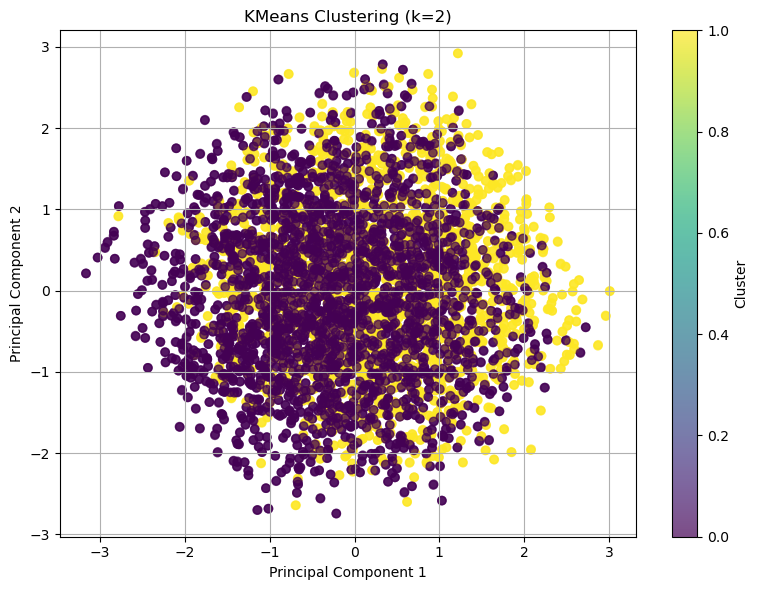

In [26]:
# Step 1: Prepare your data
df_for_eval = data_df_model.copy()
if "Cluster" in df_for_eval.columns:
    df_for_eval = df_for_eval.drop(columns=["Cluster"])
X_prepared = preprocessor.transform(df_for_eval)

# Step 2: Loop through k values and evaluate
k_range = range(2, 11)
results = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=30,
        max_iter=500,
        random_state=42
    )
    labels = kmeans.fit_predict(X_prepared)
    sil_score = silhouette_score(X_prepared, labels)
    ch_score = calinski_harabasz_score(X_prepared, labels)
    results.append((k, sil_score, ch_score, kmeans))

# Step 3: Find the best k using Silhouette Score
best_result = max(results, key=lambda x: x[1])
best_k = best_result[0]
best_sil = best_result[1]
best_ch = best_result[2]
best_model = best_result[3]

print(f"✅ Best k: {best_k}")
print(f"Silhouette Score: {best_sil:.4f}")
print(f"Calinski-Harabasz Index: {best_ch:.2f}")

# Step 4: Save the best model + preprocessor
with open("best_kmeans_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

# Step 5: PCA Visualization of best model
labels = best_model.predict(X_prepared)
X_pca = PCA(n_components=2).fit_transform(X_prepared)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

----
That Silhouette Score of 0.0773 is modest, and the Calinski-Harabasz Index of 650.82 shows solid inter-cluster separation. It’s not textbook perfect—but it’s real-world strong.

Now we lock it in with KMeans at k=2.

---

In [27]:
# ✅ Step 1: Prepare the data
df_for_eval = data_df_model.copy()
if "Cluster" in df_for_eval.columns:
    df_for_eval = df_for_eval.drop(columns=["Cluster"])
X_prepared = preprocessor.transform(df_for_eval)

# ✅ Step 2: Final-fit KMeans with optimal settings
kmeans_final = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=30,
    max_iter=500,
    random_state=42
)
kmeans_final.fit(X_prepared)

KMeans(max_iter=500, n_clusters=2, n_init=30, random_state=42)

## Saving the model

In [28]:
# Save the final KMeans model and preprocessor under your custom name
with open("successpulse.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

#### What the model does:
🧠 Automatically maps "Price" → "Purchase Amount", "Sex" → "Target Gender", etc. using fuzzy matching

🚫 Rejects CSV only if required columns are still missing after mapping

🧪 Predicts success using user-trained model, not a static one

🔄 Maintains your original scoring logic